In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from pmdarima.preprocessing import BoxCoxEndogTransformer
from pmdarima.pipeline import Pipeline
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

In [2]:
def date_to_datetime(data):
    data.time = pd.to_datetime(data.time, infer_datetime_format=True)

    data = data.set_index('time', drop=True)  

    return data    

In [3]:
data_v1 = pd.read_csv("data/data_v1.csv")
data_v2 = pd.read_csv("data/data_v2.csv")

data_v1 = date_to_datetime(data_v1)
data_v2 = date_to_datetime(data_v2)


In [4]:
data = data_v2.copy()

In [200]:
test_split_date = '2017-12-18'
#train_start_date = '2017-11-18'
train_start_date = '2017-11-27'

train = data.loc[(train_start_date <= data.index) & (data.index < test_split_date)]
test = data.loc[data.index >= test_split_date].dropna()

exog_train = train.drop(["price"], axis=1)
exog_test = test.drop(["price"], axis=1)

train=np.log(train.drop(["exog"], axis=1))
test=np.log(test.drop(["exog"], axis=1))

In [153]:
sarimax = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-1295.585, Time=11.03 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-978.058, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-1228.440, Time=1.99 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-1192.941, Time=2.10 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-980.053, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-1292.583, Time=7.59 sec
 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-1289.044, Time=8.01 sec
 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=-1285.625, Time=50.38 sec
 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=-1295.562, Time=28.72 sec
 ARIMA(2,1,2)(0,0,0)[24] intercept   : AIC=inf, Time=0.96 sec
 ARIMA(2,1,2)(0,0,2)[24] intercept   : AIC=-1239.485, Time=22.40 sec
 ARIMA(2,1,2)(2,0,0)[24] intercept   : AIC=-1253.651, Time=29.60 sec
 ARIMA(2,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=38.78 sec
 ARIMA(1,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=7.23 sec
 ARIMA(2,1,1)(1,0,1

AutoARIMA(m=24, trace=True)

In [201]:
#with exogenos data

sarimax = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax.fit(train,exog_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-759.892, Time=3.26 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-977.472, Time=0.12 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-1203.382, Time=4.50 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-1144.425, Time=1.93 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-979.119, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=-1201.020, Time=0.20 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=-1217.366, Time=7.36 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=-1253.185, Time=7.06 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=-1209.234, Time=2.15 sec
 ARIMA(1,1,0)(2,0,2)[24] intercept   : AIC=inf, Time=12.32 sec
 ARIMA(1,1,0)(1,0,2)[24] intercept   : AIC=-1168.949, Time=8.83 sec
 ARIMA(0,1,0)(2,0,1)[24] intercept   : AIC=-1096.892, Time=8.81 sec
 ARIMA(2,1,0)(2,0,1)[24] intercept   : AIC=-1258.195, Time=9.79 sec
 ARIMA(2,1,0)(1,0,1)[24] intercept   : AIC=-1221.804, Time=2.63 sec
 ARIMA(2,1,0)

AutoARIMA(m=24, trace=True)

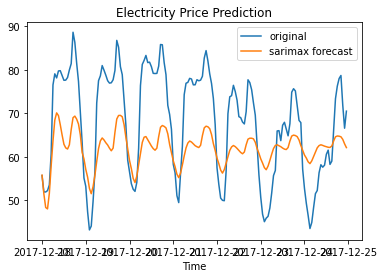

In [203]:
plt.plot(np.exp(test), label='original')
plt.plot(test.index, np.exp(sarimax.predict(len(test), exog_test)), label='sarimax forecast')
plt.xlabel('Time')
plt.title('Electricity Price Prediction')
plt.legend()
plt.show()

In [204]:
mean_absolute_error(np.exp(sarimax.predict(len(test), exog_test)),np.exp(test.price))

9.584579678506962

In [242]:
# sets up the SARIMAX model without exog
sarimax_c = SARIMAX(train,
                         order=(2, 1, 1),              # <-- keeping same parameters as before
                         seasonal_order=(1, 0, 2, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results = sarimax_c.fit(maxiter=1000)



C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [248]:
# predictions
sarimax_predictions = np.exp(sarimax_results.predict()) # grab the prediction from our model and undo the log transform using exp

In [249]:
#eforecast
sarimax_forecast = sarimax_results.get_forecast(168)
mean_absolute_error(np.exp(sarimax_forecast.predicted_mean),np.exp(test))

7.220399065818139

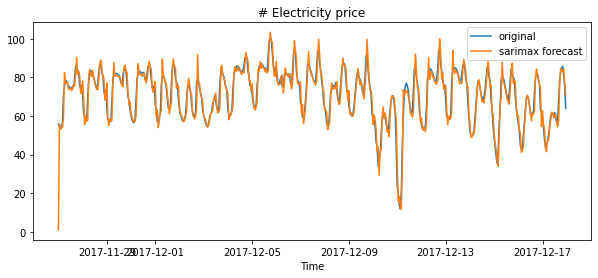

In [234]:
plt.plot(np.exp(train), label='original')
plt.plot(sarimax_predictions, label='sarimax forecast')
plt.xlabel('Time')
plt.title('# Electricity price')
plt.legend()
plt.show()

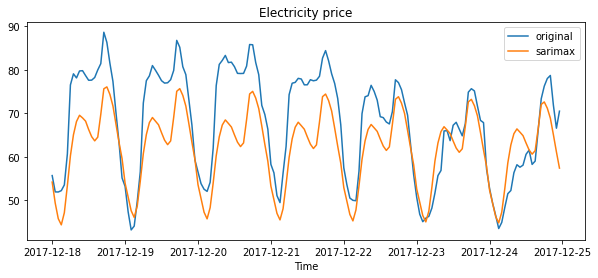

In [250]:
plt.rcParams['figure.figsize'] = (10, 4)
plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast.predicted_mean), label='sarimax')
plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()

In [191]:
mean_absolute_error(np.exp(sarimax_forecast.predicted_mean),np.exp(test))

7.220399065818139

In [220]:
# sets up the SARIMAX model with exog data
sarimax_exog = SARIMAX(train, exog = exog_train,       
                         order=(5, 1, 0),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 1, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results_exog = sarimax_exog.fit(maxiter=1000)



C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [246]:
# predictions
sarimax_predictions_exog = np.exp(sarimax_results_exog.predict()) # grab the prediction from our model and undo the log transform using exp

In [247]:
#forecast
sarimax_forecast_exog = sarimax_results_exog.get_forecast(168, exog=exog_test)
mean_absolute_error(np.exp(sarimax_forecast_exog.predicted_mean),np.exp(test))

9.584579678506962

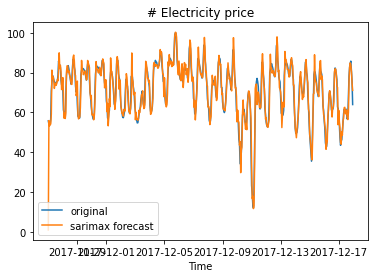

In [223]:
plt.plot(np.exp(train), label='original')
plt.plot(sarimax_predictions_exog, label='sarimax forecast')
plt.xlabel('Time')
plt.title('# Electricity price')
plt.legend()
plt.show()

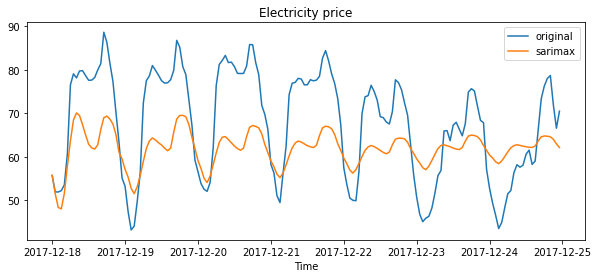

In [226]:
#forecast
sarimax_forecast_exog = sarimax_results_exog.get_forecast(168, exog=exog_test)
mean_absolute_error(np.exp(sarimax_forecast_exog.predicted_mean),np.exp(test))
plt.rcParams['figure.figsize'] = (10, 4)

plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast_exog.predicted_mean), label='sarimax')
plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()

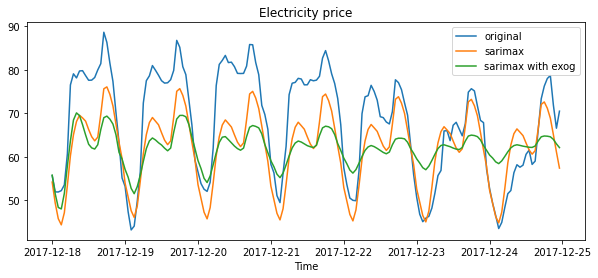

In [227]:
plt.rcParams['figure.figsize'] = (10, 4)

plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast.predicted_mean), label='sarimax')
plt.plot(np.exp(sarimax_forecast_exog.predicted_mean), label='sarimax with exog')

plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()

In [66]:
data_v1

,price,exog
time,,
2017-11-27 00:00:00,55.78,3889.0
2017-11-27 01:00:00,54.15,3565.0
2017-11-27 02:00:00,53.89,3186.0
2017-11-27 03:00:00,53.89,2752.0
2017-11-27 04:00:00,56.71,2435.0
...,...,...
2017-12-31 19:00:00,NaN,14922.0
2017-12-31 20:00:00,NaN,14321.0
2017-12-31 21:00:00,NaN,14087.0


In [282]:
##with all data included

data = data_v2.copy()
train_start_date = '2015-01-01'

train_all = data.loc[(train_start_date <= data.index)].dropna()
exog_train_all = train_all.drop(["price"], axis=1)
train_all=np.log(train_all.drop(["exog"], axis=1))

exog_test_all = data.iloc[-168:].drop(["price"], axis=1)


In [283]:
# sets up the SARIMAX model without exog, all data included
sarimax_all = SARIMAX(train_all,        
                         order=(2, 1, 1),              # <-- keeping same parameters as before
                         seasonal_order=(1, 0, 2, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results_all = sarimax_all.fit(maxiter=1000)



C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [284]:
#forecast
sarimax_forecast_all = sarimax_results_all.get_forecast(168)


In [272]:
# sets up the SARIMAX model with exog data
sarimax_exog_all = SARIMAX(train_all, exog = exog_train_all,        
                         order=(5, 1, 0),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 1, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results_exog_all = sarimax_exog_all.fit(maxiter=1000)



C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [273]:
#forecast
sarimax_forecast_exog_all = sarimax_results_exog_all.get_forecast(168, exog=exog_test_all)


In [252]:
##with all data v1 included

data=data_v1.copy()
train_start_date = '2015-01-01'

train_all = data.loc[(train_start_date <= data.index)].dropna()
exog_train_all = train_all.drop(["price"], axis=1)
train_all=np.log(train_all.drop(["exog"], axis=1))

exog_test_all = data.iloc[-168:].drop(["price"], axis=1)


In [194]:
# sets up the SARIMAX model without exog, all data included
sarimax_all_v1 = SARIMAX(train_all,        
                         order=(2, 1, 1),              # <-- keeping same parameters as before
                         seasonal_order=(1, 0, 2, 24)) # <-- we'll get into how we found these hyper parameters later


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [195]:
# trains the SARIMAX model
sarimax_results_all_v1 = sarimax_all_v1.fit(maxiter=1000)

In [196]:
#forecast
sarimax_forecast_all_v1 = sarimax_results_all_v1.get_forecast(168)


In [254]:
# sets up the SARIMAX model WITH EXOG DATA
sarimax_exog_all_v1 = SARIMAX(train_all, exog = exog_train_all, 
                            order=(5, 1, 0),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 1, 24)) # <-- we'll get into how we found these hyper parameters later



# trains the SARIMAX model
sarimax_results_exog_all_v1 = sarimax_exog_all_v1.fit(maxiter=1000)



C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [255]:
#forecast
sarimax_forecast_exog_all_v1 = sarimax_results_exog_all_v1.get_forecast(168, exog=exog_test_all.exog)
sarimax_forecast_exog_all_v1.predicted_mean.plot()


<AxesSubplot:>

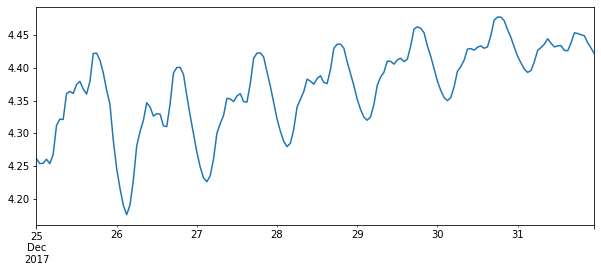

In [285]:
sarimax_forecast_all_submission = pd.DataFrame(np.exp(sarimax_forecast_all.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_all_submission = sarimax_forecast_all_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_all_submission.to_csv("sarimax_forecast_all_submission", index=False)

In [274]:
sarimax_forecast_exog_all_submission = pd.DataFrame(np.exp(sarimax_forecast_exog_all.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_exog_all_submission = sarimax_forecast_exog_all_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_exog_all_submission.to_csv("sarimax_forecast_exog_all_submission", index=False)

In [199]:
sarimax_forecast_all_v1_submission = pd.DataFrame(np.exp(sarimax_forecast_all_v1.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_all_v1_submission = sarimax_forecast_all_v1_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_all_v1_submission.to_csv("sarimax_forecast_all_v1_submission", index=False)

In [122]:
sarimax_forecast_exog_all_v1_submission = pd.DataFrame(np.exp(sarimax_forecast_exog_all_v1.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_exog_all_v1_submission = sarimax_forecast_exog_all_v1_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_exog_all_v1_submission.to_csv("sarimax_forecast_exog_all_v1_submission", index=False)

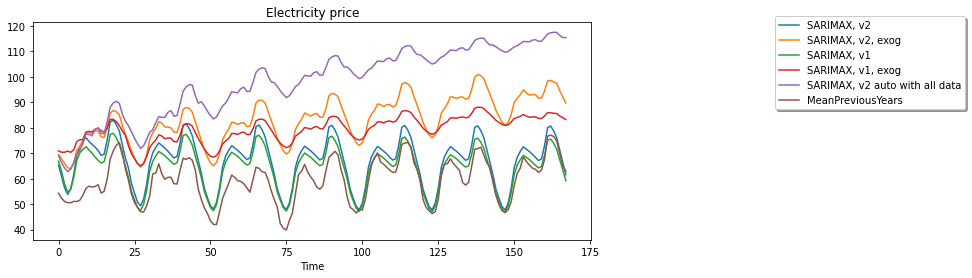

In [24]:
plt.plot(pd.read_csv("sarimax_forecast_all_submission"), label="SARIMAX, v2") #18

plt.plot(pd.read_csv("sarimax_forecast_exog_all_submission"), label="SARIMAX, v2, exog") #not submitted

plt.plot(pd.read_csv("sarimax_forecast_all_v1_submission"), label="SARIMAX, v1") ##15

plt.plot(pd.read_csv("sarimax_forecast_exog_all_v1_submission"), label="SARIMAX, v1, exog") #not submiitted
plt.plot(pd.read_csv("sarimax_forecast_all_v2_submission"), label="SARIMAX, v2 auto with all data") #48
#plt.plot(pd.read_csv("sarimax_no_exogenus_v2"), label="SARIMAX, v2") ##33
#plt.plot(pd.read_csv("linear_regression_submission3"), label="LinearRegression") ##20 
#plt.plot(pd.read_csv("gradient_boost_submission4"), label="GradientBoost, lag24") ##19
#plt.plot(pd.read_csv("gradient_boost_with_exog_lag24"), label="GradientBoost, lag24, with exog") ##19
plt.plot(pd.read_csv("mean_previous_years"), label="MeanPreviousYears") ##11.85

plt.xlabel('Time')
plt.title('Electricity price')
plt.legend(loc='upper center', bbox_to_anchor=(1.5, 1.05), fancybox=True, shadow=True)
plt.show()

In [ ]:
sarimax_forecast_all_v1_submission = pd.DataFrame(np.exp(sarimax_forecast_all_v1.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_all_v1_submission = sarimax_forecast_all_v1_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_all_v1_submission.to_csv("sarimax_forecast_all_v1_submission", index=False)

In [259]:
sarimax_forecast_exog_all_v1_submission = pd.DataFrame(np.exp(sarimax_forecast_exog_all_v1.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_exog_all_v1_submission = sarimax_forecast_exog_all_v1_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_exog_all_v1_submission.to_csv("sarimax_forecast_exog_all_v1_submission", index=False)

In [ ]:
sarimax_forecast_exog_all_submission = pd.DataFrame(np.exp(sarimax_forecast_exog_all.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_exog_all_submission = sarimax_forecast_exog_all_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_exog_all_submission.to_csv("sarimax_forecast_exog_all_submission", index=False)

In [ ]:
sarimax_forecast_all_submission = pd.DataFrame(np.exp(sarimax_forecast_all.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_all_submission = sarimax_forecast_all_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_all_submission.to_csv("sarimax_forecast_all_submission", index=False)

In [7]:
##find best parmeters using all data

data = data_v2.copy()

test_split_date = '2017-12-18'
#train_start_date = '2017-11-18'
train_start_date = '2015-01-01'

train = data.loc[(train_start_date <= data.index) & (data.index < test_split_date)]
test = data.loc[data.index >= test_split_date].dropna()

exog_train = train.drop(["price"], axis=1)
exog_test = test.drop(["price"], axis=1)

train=np.log(train.drop(["exog"], axis=1))
test=np.log(test.drop(["exog"], axis=1))


In [290]:
#without exogenos data

sarimax = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=inf, Time=164.48 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-61628.461, Time=2.69 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-75739.092, Time=43.33 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-72336.602, Time=61.79 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-61630.461, Time=0.85 sec
 ARIMA(1,1,0)(0,0,0)[24] intercept   : AIC=-68777.033, Time=1.51 sec
 ARIMA(1,1,0)(2,0,0)[24] intercept   : AIC=-77513.908, Time=301.92 sec
 ARIMA(1,1,0)(2,0,1)[24] intercept   : AIC=inf, Time=432.85 sec
 ARIMA(1,1,0)(1,0,1)[24] intercept   : AIC=inf, Time=76.02 sec
 ARIMA(0,1,0)(2,0,0)[24] intercept   : AIC=inf, Time=162.54 sec
 ARIMA(2,1,0)(2,0,0)[24] intercept   : AIC=-77512.112, Time=440.09 sec
 ARIMA(1,1,1)(2,0,0)[24] intercept   : AIC=-77512.043, Time=407.85 sec
 ARIMA(0,1,1)(2,0,0)[24] intercept   : AIC=-77435.287, Time=291.48 sec
 ARIMA(2,1,1)(2,0,0)[24] intercept   : AIC=-77510.161, Time=530.02 sec


AutoARIMA(m=24, trace=True)

In [10]:
# sets up the SARIMAX model without exog, all data included, based on model suggested with all data
sarimax_v2 = SARIMAX(train,        
                         order=(1, 1, 0),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 0, 24)) # <-- we'll get into how we found these hyper parameters later

C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


In [11]:
# trains the SARIMAX model
sarimax_results_v2 = sarimax_v2.fit(maxiter=1000)

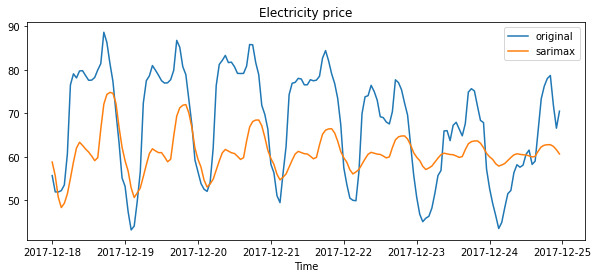

10.3663103799912

In [14]:
#forecast
sarimax_forecast_v2 = sarimax_results_v2.get_forecast(168)
plt.rcParams['figure.figsize'] = (10, 4)

plt.plot(np.exp(test), label='original')
plt.plot(np.exp(sarimax_forecast_v2.predicted_mean), label='sarimax')
plt.xlabel('Time')
plt.title('Electricity price')
plt.legend()
plt.show()
mean_absolute_error(np.exp(sarimax_forecast_v2.predicted_mean),np.exp(test))


In [6]:
##with all data included

data = data_v2.copy()
train_start_date = '2015-01-01'

train_all = data.loc[(train_start_date <= data.index)].dropna()
exog_train_all = train_all.drop(["price"], axis=1)
train_all=np.log(train_all.drop(["exog"], axis=1))

exog_test_all = data.iloc[-168:].drop(["price"], axis=1)


In [20]:
# sets up the SARIMAX model without exog, all data included, based on model suggested with all data
sarimax_v2_all = SARIMAX(train_all,        
                         order=(1, 1, 0),              # <-- keeping same parameters as before
                         seasonal_order=(2, 0, 0, 24)) # <-- we'll get into how we found these hyper parameters later


# trains the SARIMAX model
sarimax_results_v2_all = sarimax_v2_all.fit(maxiter=1000)

C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:>

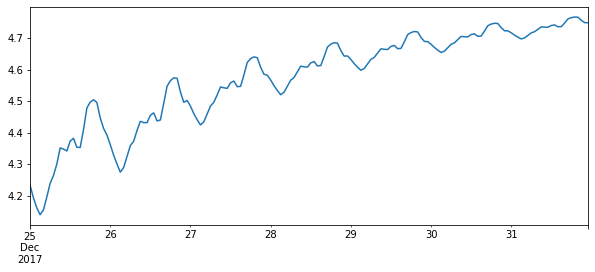

In [21]:
#forecast
sarimax_forecast_all_v2 = sarimax_results_v2_all.get_forecast(168)
sarimax_forecast_all_v2.predicted_mean.plot()



In [23]:
sarimax_forecast_all_v2_submission = pd.DataFrame(np.exp(sarimax_forecast_all_v2.predicted_mean), columns=["predicted_mean"])
sarimax_forecast_all_v2_submission = sarimax_forecast_all_v2_submission.reset_index(drop=True)["predicted_mean"].rename("price")
sarimax_forecast_all_v2_submission.to_csv("sarimax_forecast_all_v2_submission", index=False)

In [8]:
#with exogenos data

sarimax_exog = pm.AutoARIMA(trace=True, supress_warnings=True, m=24)
sarimax_exog.fit(train,exog_train)

Performing stepwise search to minimize aic


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,1,2)(1,0,1)[24] intercept   : AIC=-77941.788, Time=58.51 sec
 ARIMA(0,1,0)(0,0,0)[24] intercept   : AIC=-61707.173, Time=4.25 sec
 ARIMA(1,1,0)(1,0,0)[24] intercept   : AIC=-73577.632, Time=84.17 sec
 ARIMA(0,1,1)(0,0,1)[24] intercept   : AIC=-70709.559, Time=29.12 sec
 ARIMA(0,1,0)(0,0,0)[24]             : AIC=-61696.700, Time=17.19 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,1,2)(0,0,1)[24] intercept   : AIC=-68053.012, Time=57.25 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(1,0,0)[24] intercept   : AIC=-74041.590, Time=57.19 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,1,2)(2,0,1)[24] intercept   : AIC=-78151.802, Time=464.22 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,1,2)(2,0,0)[24] intercept   : AIC=-75723.086, Time=397.81 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=477.96 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,1,2)(1,0,2)[24] intercept   : AIC=inf, Time=434.61 sec
 ARIMA(1,1,2)(2,0,1)[24] intercept   : AIC=-76843.929, Time=334.41 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(2,1,1)(2,0,1)[24] intercept   : AIC=-77717.221, Time=401.75 sec
 ARIMA(3,1,2)(2,0,1)[24] intercept   : AIC=-78337.438, Time=477.56 sec
 ARIMA(3,1,2)(1,0,1)[24] intercept   : AIC=-78121.878, Time=59.14 sec
 ARIMA(3,1,2)(2,0,0)[24] intercept   : AIC=-75844.550, Time=395.76 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(3,1,2)(2,0,2)[24] intercept   : AIC=inf, Time=502.50 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(1,0,0)[24] intercept   : AIC=-74118.470, Time=58.02 sec
 ARIMA(3,1,2)(1,0,2)[24] intercept   : AIC=inf, Time=456.69 sec
 ARIMA(3,1,1)(2,0,1)[24] intercept   : AIC=-76614.252, Time=419.25 sec
 ARIMA(4,1,2)(2,0,1)[24] intercept   : AIC=-57986.933, Time=457.36 sec
 ARIMA(3,1,3)(2,0,1)[24] intercept   : AIC=-77236.905, Time=483.23 sec
 ARIMA(2,1,3)(2,0,1)[24] intercept   : AIC=-43799.694, Time=625.26 sec
 ARIMA(4,1,1)(2,0,1)[24] intercept   : AIC=-76929.985, Time=457.63 sec
 ARIMA(4,1,3)(2,0,1)[24] intercept   : AIC=-64495.299, Time=526.29 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(3,1,2)(2,0,1)[24]             : AIC=-78339.441, Time=458.75 sec
 ARIMA(3,1,2)(1,0,1)[24]             : AIC=-78123.880, Time=45.81 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(2,0,0)[24]             : AIC=-75846.550, Time=389.21 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(3,1,2)(2,0,2)[24]             : AIC=inf, Time=456.77 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,1,2)(1,0,0)[24]             : AIC=-74120.471, Time=45.73 sec


C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1890: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:38: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.arroots()))
C:\Users\amilas\Miniconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1897: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
C:\Users\amilas\Miniconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:40: RuntimeWarning: invalid value encountered in true_divide
  max_invroot = max(0, *np.abs(1 / model.maroots()))


 ARIMA(3,1,2)(1,0,2)[24]             : AIC=inf, Time=426.70 sec


MemoryError: Unable to allocate 515. MiB for an array with shape (51, 51, 25968) and data type float64